## **Fast AI Experements Based on [this](https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e) blog**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!unzip drive/My\ Drive/ammi-2020-convnets.zip 


Archive:  drive/My Drive/ammi-2020-convnets.zip
replace extraimages/extraimages/extra-image-1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
!pip install pretrainedmodels
!pip uninstall torch torchvision -y 
!pip install torch==1.4.0 torchvision==0.5.0 

Uninstalling torch-1.4.0:
  Successfully uninstalled torch-1.4.0
Uninstalling torchvision-0.5.0:
  Successfully uninstalled torchvision-0.5.0
  Using cached https://files.pythonhosted.org/packages/24/19/4804aea17cd136f1705a5e98a00618cb8f6ccc375ad8bfa437408e09d058/torch-1.4.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/7e/90/6141bf41f5655c78e24f40f710fdd4f8a8aff6c8b7c6f0328240f649bdbe/torchvision-0.5.0-cp36-cp36m-manylinux1_x86_64.whl


# Importing Fast AI library

In [0]:
import os 
import pretrainedmodels

In [0]:
from fastai import *
from fastai.vision import *

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

from math import floor

# Looking at the data

In [0]:
train_path = "./train/train"
test_path = "./test/test/0"

In [0]:
def get_labels(file_path): 
    dir_name = os.path.dirname(file_path)
    split_dir_name = dir_name.split("/")
    dir_levels = len(split_dir_name)
    label  = split_dir_name[dir_levels - 1]
    return(label)

In [19]:
get_labels("./train/train/cgm/train-cgm-528.jpg")

'cgm'

In [20]:
from glob import glob
imagePatches = glob("./train/train/*/*.*", recursive=True)
imagePatches[0:10]

['./train/train/healthy/train-healthy-103.jpg',
 './train/train/healthy/train-healthy-280.jpg',
 './train/train/healthy/train-healthy-191.jpg',
 './train/train/healthy/train-healthy-161.jpg',
 './train/train/healthy/train-healthy-243.jpg',
 './train/train/healthy/train-healthy-313.jpg',
 './train/train/healthy/train-healthy-218.jpg',
 './train/train/healthy/train-healthy-203.jpg',
 './train/train/healthy/train-healthy-17.jpg',
 './train/train/healthy/train-healthy-166.jpg']

In [0]:
path=""
tfms = get_transforms()

In [0]:
data = ImageDataBunch.from_name_func(path, imagePatches, label_func=get_labels,  size=256, 
                                     bs=32,num_workers=2,test = test_path,ds_tfms=tfms
                                  ).normalize(imagenet_stats)

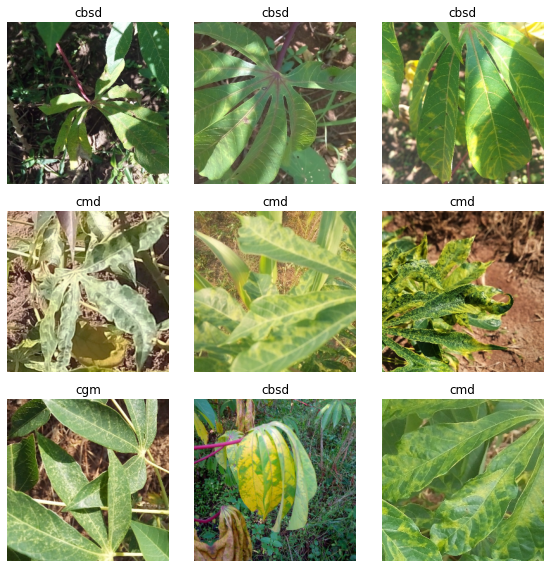

In [27]:
data.show_batch(rows=3, figsize=(8,8))

In [28]:
print(data.classes)
len(data.classes),data.c

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


(5, 5)

# Transfer learning using a pre-trained model: ResNet 50

In [45]:
## To create a ResNET 50 with pretrained weights
learn = create_cnn(data,models.densenet121, metrics=[error_rate,accuracy])

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


In [0]:
learn.fit_one_cycle(50)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.451744,0.899461,0.295314,0.704686,01:00
1,1.105256,0.776145,0.229885,0.770115,00:59
2,0.934409,0.707528,0.209549,0.790451,00:59
3,0.835290,0.715419,0.199823,0.800177,00:59
4,0.721358,0.635212,0.180371,0.819629,00:59
5,0.658061,0.629702,0.190097,0.809903,00:59
6,0.642366,0.567732,0.175066,0.824934,00:59
7,0.555350,0.545433,0.182140,0.817860,00:59
8,0.543932,0.505699,0.165340,0.834660,00:59
9,0.527781,0.532761,0.167993,0.832007,00:59


In [0]:
learn.save('resnet_50_82.pt')

# Result Exploration

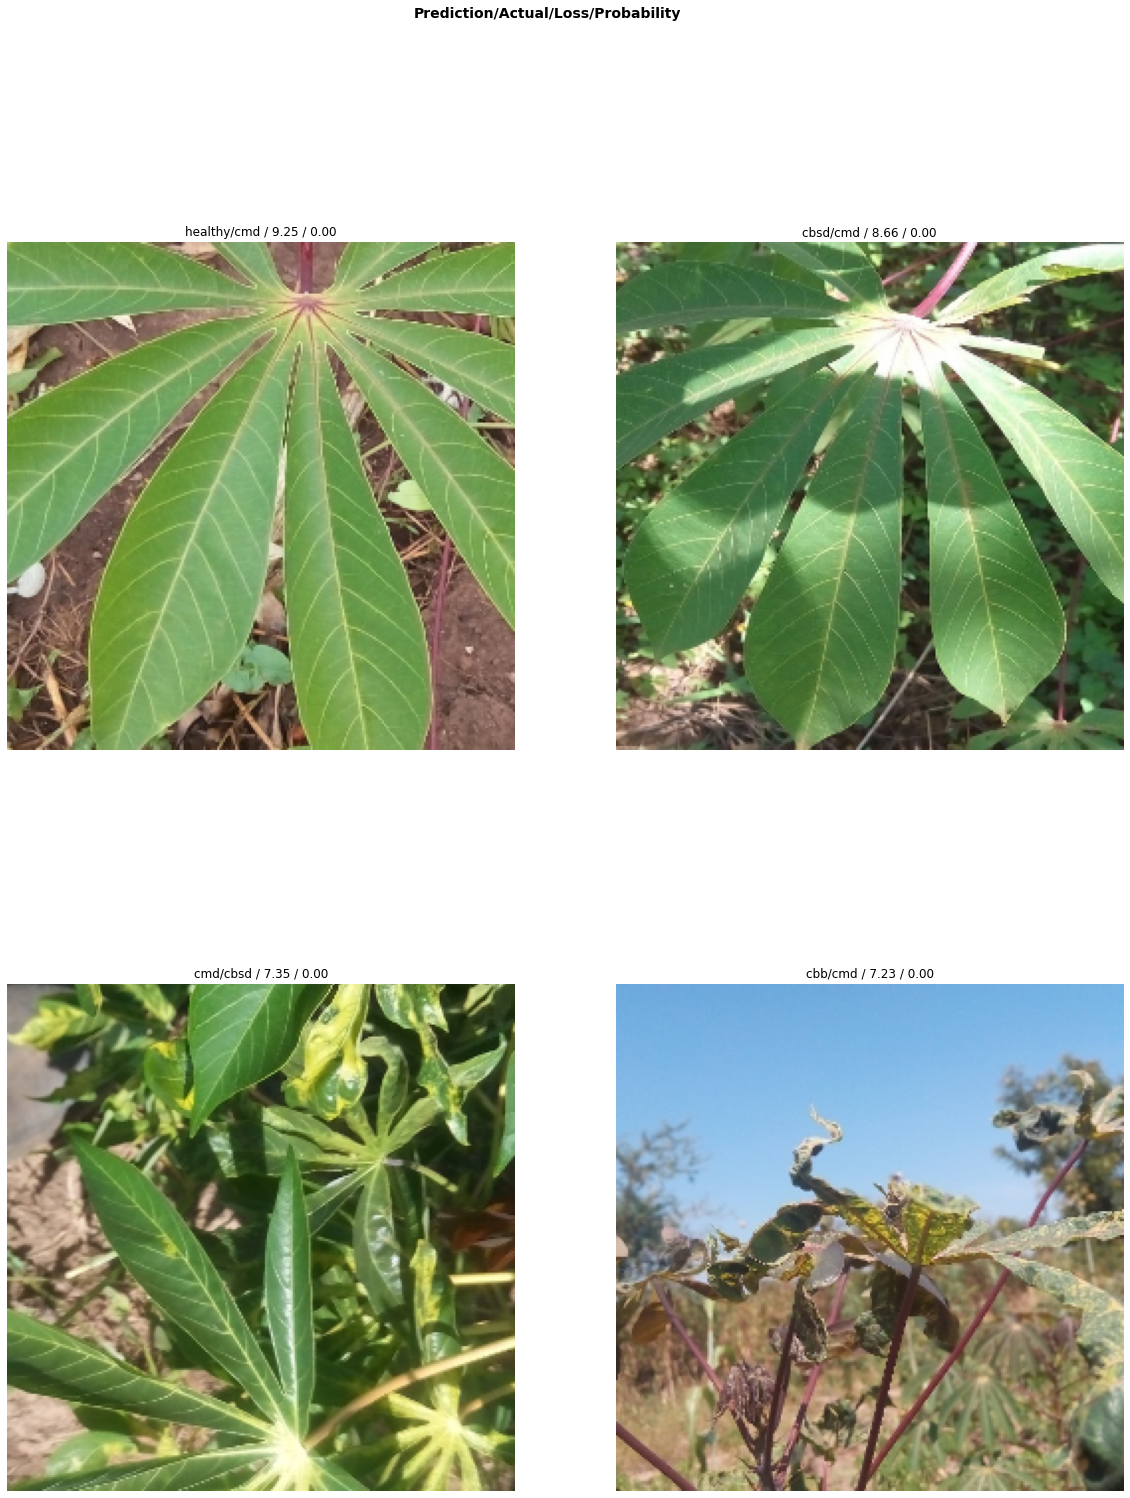

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,25))

# Confusion Matrix

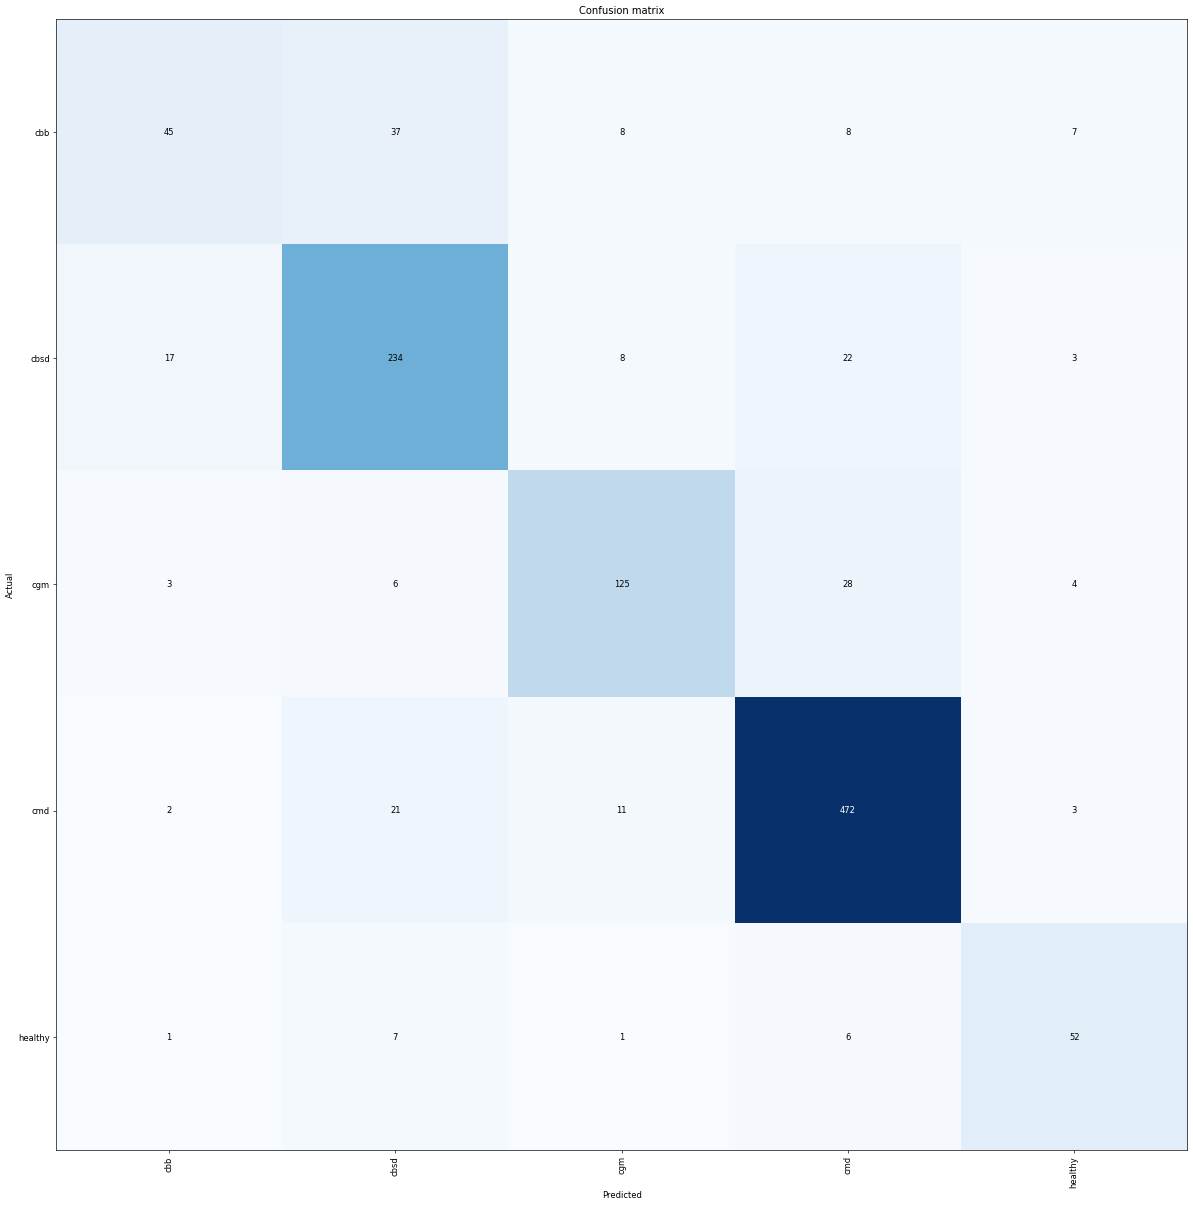

In [35]:
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

# LR Finder

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


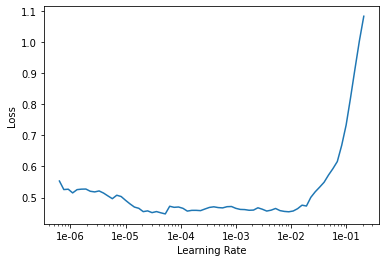

In [36]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.806462,0.700927,0.251989,0.748011,00:58
1,1.170216,61.801384,0.463307,0.536693,00:58


KeyboardInterrupt: ignored